In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
import env

### PART I

In [2]:
# Use the iris database to answer the following quesitons:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


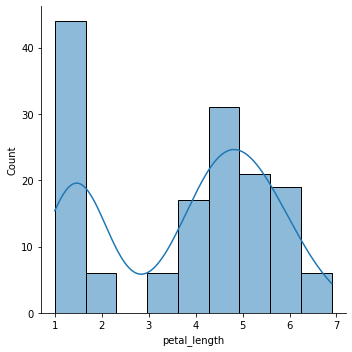

In [149]:
# 1. What does the distribution of petal lengths look like?
sns.displot(iris.petal_length, kde=True)

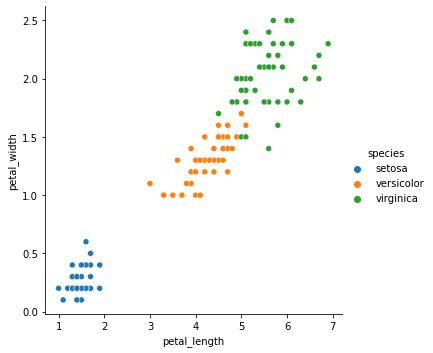

In [151]:
# 2. Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine 
# if a correlation exists between two numeric columns.
sns.relplot(data=iris, x='petal_length', y='petal_width', hue='species')

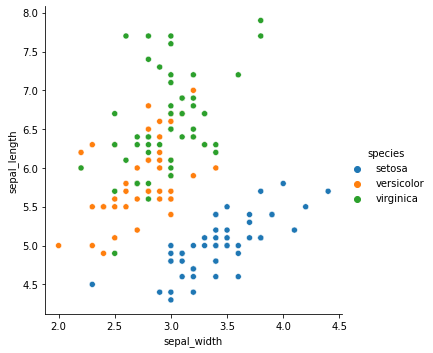

In [152]:
# 3. Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the 
# lense of a categorical column.
sns.relplot(data=iris, x='sepal_width', y='sepal_length', hue='species')

<AxesSubplot:xlabel='species', ylabel='petal_length'>

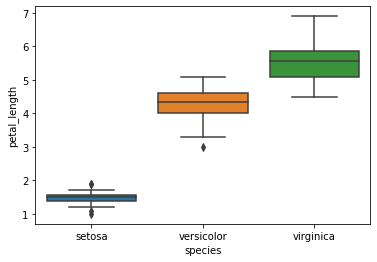

In [154]:
# 4. Which features would be best used to predict species?
sns.boxplot(data=iris, x='species', y='petal_length')

### PART II

In [155]:
# 1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset 
# column, and calculate summary statistics for each dataset. What do you notice?
ans = sns.load_dataset('anscombe')

In [156]:
ans.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

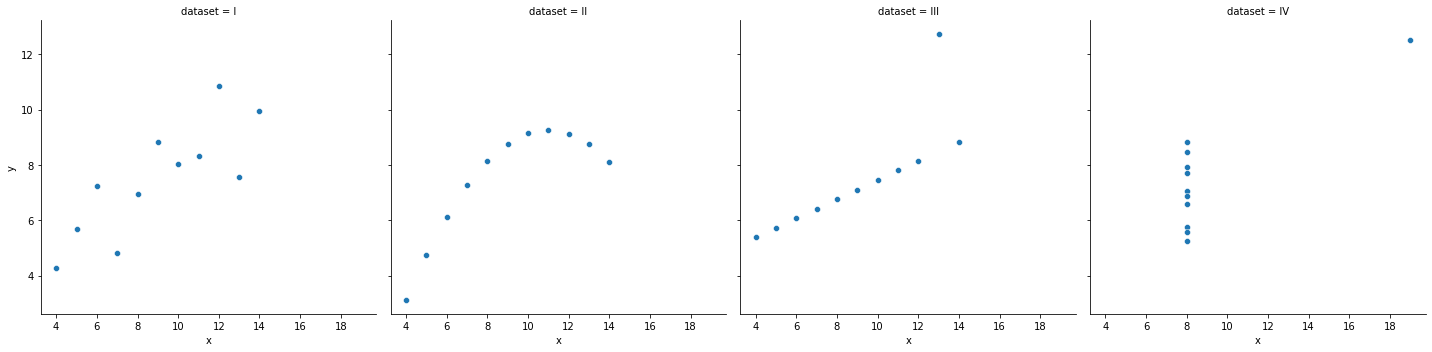

In [157]:
# Plot the x and y values from the anscombe data. Each dataset should be in a separate column.
sns.relplot(data=ans, x='x', y='y', col='dataset')

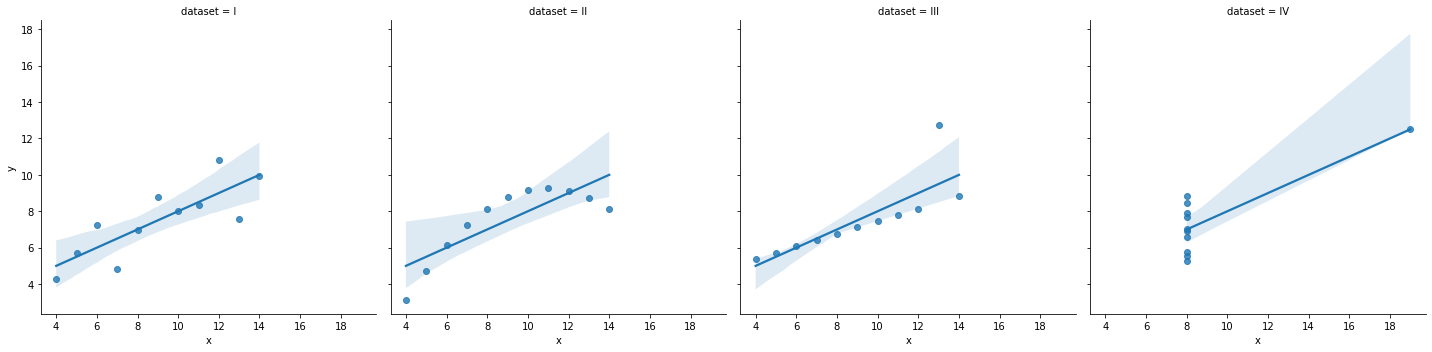

In [159]:
sns.lmplot(data=ans, x='x', y='y', col='dataset')

In [160]:
# 2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.
insps = data('InsectSprays')
insps.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


<AxesSubplot:xlabel='spray', ylabel='count'>

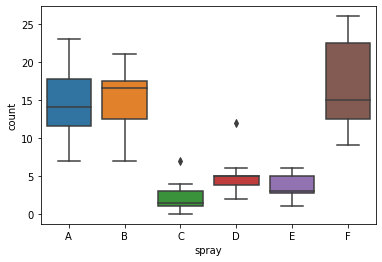

In [161]:
sns.boxplot(data=insps, x='spray', y='count')

In [162]:
# 3.  Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to 
# answer the following questions:
swiss = data('swiss')
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [163]:
# 3.a Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what 
# constitutes catholic)
swiss['is_catholic'] = swiss.Catholic >= 50
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


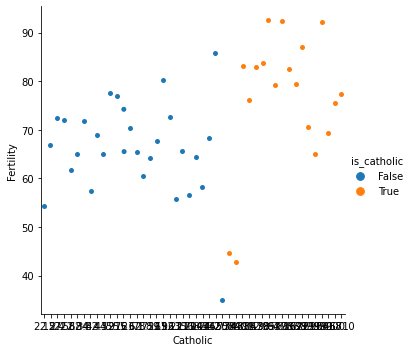

In [164]:
# 3.b Does whether or not a province is Catholic influence fertility?
sns.catplot(data=swiss, x='Catholic', y='Fertility', hue='is_catholic')

<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

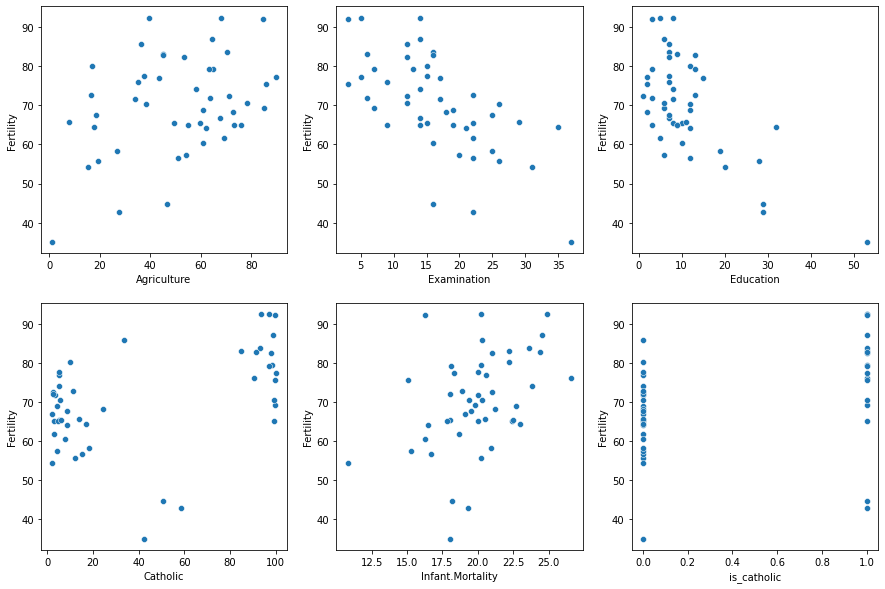

In [166]:
# 3.c What measure correlates most strongly with fertility?
fig, ax = plt.subplots(2,3, figsize=(15,10))

sns.scatterplot(data=swiss, x='Agriculture', y='Fertility', ax=ax[0,0])
sns.scatterplot(data=swiss, x='Examination', y='Fertility', ax=ax[0,1])
sns.scatterplot(data=swiss, x='Education', y='Fertility', ax=ax[0,2])
sns.scatterplot(data=swiss, x='Catholic', y='Fertility', ax=ax[1,0])
sns.scatterplot(data=swiss, x='Infant.Mortality', y='Fertility', ax=ax[1,1])
sns.scatterplot(data=swiss, x='is_catholic', y='Fertility', ax=ax[1,2])

In [167]:
swiss.corrwith(swiss.Fertility)

Fertility           1.000000
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Catholic            0.463685
Infant.Mortality    0.416556
is_catholic         0.402813
dtype: float64

<AxesSubplot:>

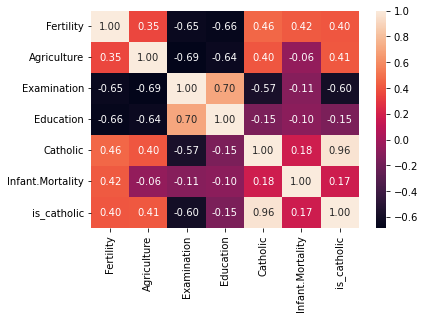

In [168]:
sns.heatmap(swiss.corr(),annot=True, fmt='.2f')

In [169]:
# 4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.
def get_db_url(user,host,password,schema):
    return f'mysql+pymysql://{user}:{password}@{host}/{schema}'
conn = get_db_url(env.user, env.host, env.password, 'chipotle')

In [170]:
chip = '''
    SELECT *
    FROM orders
'''

In [171]:
chipo = pd.read_sql(chip, conn)

In [172]:
chipo.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [173]:
chipo['item_price'] = chipo.item_price.str.strip('$').astype('float')

In [174]:
pop =chipo[['item_name', 'quantity', 'item_price']].groupby('item_name', as_index=False).agg({'quantity':'sum', 'item_price':'sum'}).sort_values(by='quantity', ascending=False).head(4)

In [175]:
pop = pop.iloc[0:5, ]

<AxesSubplot:xlabel='item_price', ylabel='item_name'>

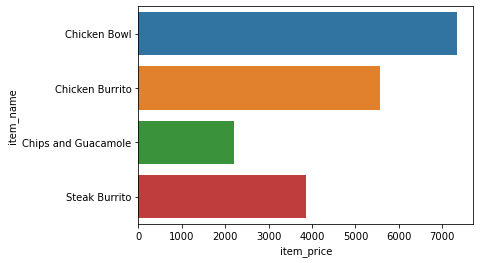

In [177]:
sns.barplot(data=pop, y='item_name', x='item_price')

In [178]:
# 5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a 
# more prominant line showing the average change in reaction time.
ss = data('sleepstudy')
ss.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [179]:
ss['Subject'] = 'Subject_' + ss.Subject.astype('str')

In [180]:
ss.head()

,Reaction,Days,Subject
1,249.5600,0,Subject_308
2,258.7047,1,Subject_308
3,250.8006,2,Subject_308
4,321.4398,3,Subject_308
5,356.8519,4,Subject_308


<AxesSubplot:xlabel='Days', ylabel='Reaction'>

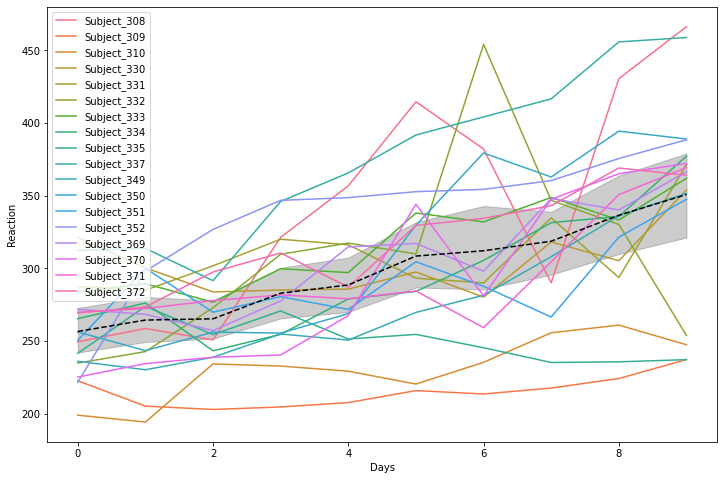

In [185]:
plt.figure(figsize=(12,8))
sns.lineplot(data=ss, x='Days', y='Reaction', hue='Subject')
sns.lineplot(data=ss, x='Days', y='Reaction', color='black', estimator='mean', linestyle='--')

In [186]:
#sns.relplot(data=ss, x='Days', y='Reaction', kind='line', col='Subject', col_wrap=5)